### Data Set a Data Frame

Se obtiene el Data Frame y se pasan las variables categóricas a numéricas.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

path_file = "dataAnimales.csv"
dataframe = pd.read_csv(path_file) 

dict_species = {
    "Mountain Lion":     0,
    "Black Bear":        1,
    "Brown Bear":        2,
    "Polar Bear":        3,
    "Muskox":            4,  # Buey
    "Gray Wolf":         5,
    "Thinhorn Sheep":    6,
    "Mountain Goat":     7,
    "Bighorn Sheep":     8,
    "Caribou":           9,  # Reno
    "Pronghorn":         10, # Berrendo
    "White-tailed Deer": 11,
    "Moose":             12, # Alce
    "Mule Deer":         13,
    "Elk":               14  # Ciervo Canadiense
}

dict_province_state = {
  'Alabama': 0, 'Alaska': 1, 'Alberta': 2, 'Arizona': 3, 'British Columbia': 4, 
  'California': 5, 'Colorado': 6, 'Florida': 7, 'Georgia': 8, 'Idaho': 9, 
  'Illinois': 10, 'Indiana': 11, 'Iowa': 12, 'Kansas': 13, 'Kentucky': 14, 
  'Maine': 15, 'Manitoba': 16, 'Minnesota': 17, 'Mississippi': 18, 'Missouri': 19, 
  'Montana': 20, 'Nebraska': 21, 'Nevada': 22, 'New Brunswick': 23, 'New Hampshire': 24, 
  'New Mexico': 25, 'New York': 26, 'Newfoundland': 27, 'North Carolina': 28, 'North Dakota': 29, 
  'Northwest Territories': 30, 'Nunavut': 31, 'Oklahoma': 32, 'Ontario': 33, 'Oregon': 34, 
  'Pennsylvania': 35, 'Quebec': 36, 'Saskatchewan': 37, 'South Dakota': 38, 'Texas': 39, 
  'Utah': 40, 'Vermont': 41, 'Virginia': 42, 'Washington': 43, 'Wyoming': 44, 'Yukon': 45
}

dict_srank = {
  'S1': 0, 'S2': 1, 'S2S3': 2, 'S3': 3, 'S3S4': 4, 'S4': 5, 'S5': 6, 'S5 ': 7
}

dict_classification = {
  'Carnivore': 0, 'Ungulate': 1
}

dict_sci = {
  'N': 0, 'Y': 1
}

pd.set_option('future.no_silent_downcasting', True) # Algo relacionado con Downcasting, ni idea pero esto elimina las advertencias/problemas.


dataframe["Species"] = dataframe["Species"].replace(
    dict_species.keys(),
    dict_species.values()
)

dataframe["Province/State"] = dataframe["Province/State"].replace(
    dict_province_state.keys(),
    dict_province_state.values()
)

dataframe["S Rank"] = dataframe["S Rank"].replace(
    dict_srank.keys(),
    dict_srank.values()
)

dataframe["Classification"] = dataframe["Classification"].replace(
    dict_classification.keys(),
    dict_classification.values()
)

dataframe["SCI"] = dataframe["SCI"].replace(
    dict_sci.keys(),
    dict_sci.values()
)


dataframe

,Species,Province/State,Price,Number of days,Day price,S Rank,Status,Classification,Avg Mass,SCI,Latitude
0,0,2,15930,10.0,1593,5,4.0,0,60.4,1,54.5000
1,0,2,9500,10.0,950,5,4.0,0,60.4,1,54.5000
2,0,2,10000,10.0,1000,5,4.0,0,60.4,1,54.5000
3,0,2,12500,10.0,1250,5,4.0,0,60.4,1,54.5000
4,0,3,5000,5.0,1000,5,4.0,0,60.4,1,34.1661
...,...,...,...,...,...,...,...,...,...,...,...
716,14,44,6600,7.0,943,6,5.0,1,327.5,0,43.0000
717,14,44,6200,5.0,1240,6,5.0,1,327.5,0,43.0000
718,14,44,5450,6.0,908,6,5.0,1,327.5,0,43.0000
719,14,44,8000,7.0,1143,6,5.0,1,327.5,0,43.0000


### Selección de la Base de Datos

El objetivo de esta red es, a partir de datos sobre caza guiada, estimar coste que tendrá tal actividad.

Es decir, por ejemplo, brindar: 
* Peso
* Rareza
* Zona geográfica
* Duración de la caza
* Etc.

y recibir un precio de coste estimado.

Si bien nuestra red neuronal se va a centrar en predecir un único resultado específico, a lo largo del análisis claramente podremos identificar correlaciones entre distintas variables y extraer todo tipo de conclusiones. Por ejemplo, podríamos observar cómo influye la rareza de una especie en la conservación de la misma, o cómo se relaciona la duración de una cacería guiada con su costo.

Entonces, tras el análisis de datos podremos tener una visión más amplia del impacto de estos factores en la caza guiada a su vez que el efecto de esta actividad sobre diversas especies de animales, todo esto mientras nuestra red está enfocada en generar una única predicción.

### 1. Análisis General

Columnas del conjunto de datos:
* Price : Costo de la caza guiada.
* S Rank: Rareza (0-7) de la especie.

### 2. Análisis de Correlaciones

S

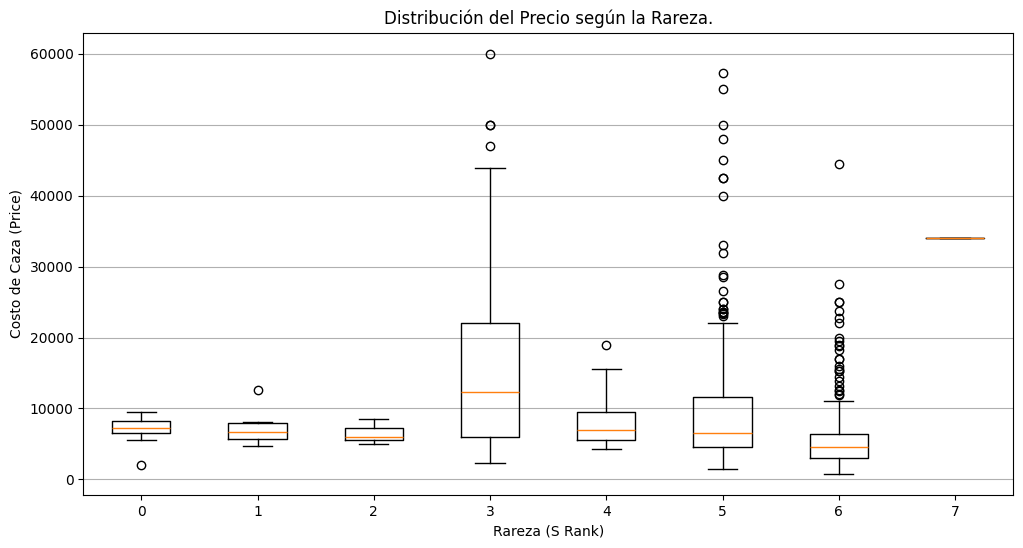

In [25]:
# S Rank Implica la rareza de la especie. 
# S1 -> 0, S5 -> 7.
# S7 implica mucha más rareza que S1.

import matplotlib.pyplot as plt

dataframe['S Rank'] = dataframe['S Rank'].astype('category')

# Esto es para crear un gráfico de cajas (BoxPlot)
plt.figure(figsize=(12, 6))

# Generamos un BoxPlot para cada S Rank.
box_data = [dataframe[dataframe['S Rank'] == s]['Price'] for s in dataframe['S Rank'].cat.categories]

# Hacemos el Gráfico.
plt.boxplot(box_data, tick_labels=dataframe['S Rank'].cat.categories)

plt.title('Distribución del Precio según la Rareza.')
plt.xlabel('Rareza (S Rank)')
plt.ylabel('Costo de Caza (Price)')

plt.grid(axis='y')
plt.show()

En el gráfico BoxPlot anterior podemos ver los valores del Data Frame, más específicamente las columnas de Precios de las guías y las Rarezas. Aunque no tengamos en cuenta otros factores, nos va a servir para sacar rápidamente las siguientes conclusiones.

En los Boxplot que se pueden obervar, los valores por fuera de las cajas son considerados atípicos, y la línea naranja sería la media.

Podemos observar que claramente la tendencia general marca que a medida que aumenta la rareza del animal también lo hace el precio de la caza guiada. Por ejemplo, el rango de precios considerado no atípico para la rareza 3 es mucho más amplia que los rangos de las demás rarezas, lo que podría indicar que en esa rareza, al ser un punto medio, ofrece una mayor variedad y oferta en precios que las demás.

Además, podemos evidenciar más valores atípicos conforme avanzamos, siendo los máximos valores atípicos los que se encuentran en la rareza 3 y la rareza 5. Y si bien la rareza 7 (que uno tal vez podría pensar que tendría el valor atípico más alto de todas las rarezas) no sigue la misma tendencia, aunque es importante destacar que su media de precio es más del doble que el resto.

Nuevamente como mencionamos al comienzo es importante destacar que no estamos teniendo otros factores en cuenta, pero con este simple pantallazo podemos sacar algunas conclusiones importantes, se puede evidenciar muy claramente la relación entre la rareza de un animal y su precio de caza guiada.

